##Building a Weather Data Pipeline: A Beginner's Data Engineering Project using Philippine Weather Data##



📝 PROJECT DESCRIPTION:
This project simulates the role of a data engineer tasked with processing raw weather data from different regions in the Philippines. Using Python, we clean, transform, and visualize the dataset to extract meaningful insights that could inform planning, agriculture, or disaster preparedness. This beginner-level project emphasizes core data engineering steps: data cleaning, transformation, and analysis, making it ideal for showcasing foundational skills.


"Analyzing Simulated Philippine Weather Patterns for June 2024"

📝 Project Description:

This project explores simulated daily weather data across key regions of the Philippines during June 2024. By cleaning, analyzing, and visualizing this dataset, we aim to identify trends in rainfall, temperature, and wind speeds. This beginner-friendly project highlights core skills in data engineering and storytelling.



.

#Importing the needed libraries and simulated data sets.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('philippines_weather_sim.csv')
df.head()


,Date,Region,Rainfall (mm),Temperature (°C),Wind Speed (kph)
0,2024-06-01,NCR,197.19,28.4,39.2
1,2024-06-01,Region III,35.70,30.9,24.2
2,2024-06-01,Region IV-A,137.37,25.8,7.6
3,2024-06-01,Region VI,21.44,37.1,33.2
4,2024-06-02,NCR,176.50,32.5,38.0


#Exploring the Simulated DataSet

In [ ]:
# Data summary
df.info()

# Stats summary
df.describe()

# Region counts
df['Region'].value_counts()

# missing values
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              120 non-null    object 
 1   Region            120 non-null    object 
 2   Rainfall (mm)     120 non-null    float64
 3   Temperature (°C)  120 non-null    float64
 4   Wind Speed (kph)  120 non-null    float64
dtypes: float64(3), object(2)
memory usage: 4.8+ KB


,0
Date,0
Region,0
Rainfall (mm),0
Temperature (°C),0
Wind Speed (kph),0


#Data Cleaning and Feature Engineering

In [ ]:
# Check data types
df.dtypes

#Add column day of the week
df['DayOfWeek'] = df['Date'].dt.day_name()
df.head()

,Date,Region,Rainfall (mm),Temperature (°C),Wind Speed (kph),DayOfWeek
0,2024-06-01,NCR,197.19,28.4,39.2,Saturday
1,2024-06-01,Region III,35.70,30.9,24.2,Saturday
2,2024-06-01,Region IV-A,137.37,25.8,7.6,Saturday
3,2024-06-01,Region VI,21.44,37.1,33.2,Saturday
4,2024-06-02,NCR,176.50,32.5,38.0,Sunday


**Classify rainfall based on common weather thresholds:**

In [ ]:
def categorize_rainfall(mm):
      if mm < 2.5:
          return 'No Rain'
      elif mm < 7.5:
          return 'Light Rain'
      elif mm < 30:
          return 'Moderate Rain'
      else:
          return 'Heavy Rain'

df['Rainfall Category'] = df['Rainfall (mm)'].apply(categorize_rainfall)
df.head()

,Date,Region,Rainfall (mm),Temperature (°C),Wind Speed (kph),DayOfWeek,Rainfall Category
0,2024-06-01,NCR,197.19,28.4,39.2,Saturday,Heavy Rain
1,2024-06-01,Region III,35.70,30.9,24.2,Saturday,Heavy Rain
2,2024-06-01,Region IV-A,137.37,25.8,7.6,Saturday,Heavy Rain
3,2024-06-01,Region VI,21.44,37.1,33.2,Saturday,Moderate Rain
4,2024-06-02,NCR,176.50,32.5,38.0,Sunday,Heavy Rain


**Classify temperature into meaningful ranges:**

In [ ]:
def categorize_temp(temp):
    if temp < 27:
        return 'Cool'
    elif temp < 33:
        return 'Warm'
    else:
      return 'Hot'

df['Temp Category'] = df['Temperature (°C)'].apply(categorize_temp)
df.head()

,Date,Region,Rainfall (mm),Temperature (°C),Wind Speed (kph),DayOfWeek,Rainfall Category,Temp Category
0,2024-06-01,NCR,197.19,28.4,39.2,Saturday,Heavy Rain,Warm
1,2024-06-01,Region III,35.70,30.9,24.2,Saturday,Heavy Rain,Warm
2,2024-06-01,Region IV-A,137.37,25.8,7.6,Saturday,Heavy Rain,Cool
3,2024-06-01,Region VI,21.44,37.1,33.2,Saturday,Moderate Rain,Hot
4,2024-06-02,NCR,176.50,32.5,38.0,Sunday,Heavy Rain,Warm


##Grouping, Summarization & Trends##
**Analyzing different patterns:**

In [ ]:
region_summary = df.groupby('Region')[['Rainfall (mm)', 'Temperature (°C)', 'Wind Speed (kph)']].mean().round(2)
print(region_summary)


             Rainfall (mm)  Temperature (°C)  Wind Speed (kph)
Region                                                        
NCR                 138.78             31.99             25.51
Region III          147.58             30.53             23.06
Region IV-A         133.88             31.27             24.28
Region VI           111.32             31.59             24.17


**🔍Insight:** Region III recorded the highest average rainfall 147 mm, while Region VI experienced the lowest 111.32 mm

Most "Heavy Rain" days occurred in Region III, suggesting a higher flood risk.



**Count of Rainfall Categories per Region**

In [ ]:
rain_category_counts = df.groupby(['Region', 'Rainfall Category']).size().unstack().fillna(0)
print(rain_category_counts)


Rainfall Category  Heavy Rain  Moderate Rain
Region                                      
NCR                        28              2
Region III                 28              2
Region IV-A                28              2
Region VI                  27              3


**🔍 Insight:** This data shows that NCR, Region III, and Region IV-A obtain the most Heavy Rain Days.

**Average Temperature by Day of the Week**

In [ ]:
day_temp = df.groupby('DayOfWeek')['Temperature (°C)'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
print(day_temp)



DayOfWeek
Monday       30.57500
Tuesday      31.92500
Wednesday    30.88125
Thursday     30.65000
Friday       32.10625
Saturday     30.47000
Sunday       32.69000
Name: Temperature (°C), dtype: float64


**🔍 Insight:** Based on the data Sunday ten to be the hottest day with temperature of 32.69 °C.

In [ ]:
daily_rain = df.groupby('Date')['Rainfall (mm)'].sum()
print(daily_rain.sort_values(ascending=False))

Date
2024-06-05    782.07
2024-06-28    733.78
2024-06-30    668.05
2024-06-17    662.51
2024-06-24    645.49
2024-06-12    636.11
2024-06-23    628.89
2024-06-18    626.89
2024-06-13    620.33
2024-06-11    617.99
2024-06-27    615.79
2024-06-06    591.32
2024-06-07    568.91
2024-06-19    560.08
2024-06-26    559.87
2024-06-20    548.57
2024-06-25    539.57
2024-06-04    533.78
2024-06-02    512.35
2024-06-22    498.98
2024-06-29    442.33
2024-06-08    441.71
2024-06-09    416.59
2024-06-01    391.70
2024-06-16    383.83
2024-06-15    368.20
2024-06-21    361.06
2024-06-14    357.21
2024-06-03    349.76
2024-06-10    282.86
Name: Rainfall (mm), dtype: float64


##📊📈📉 Visualizing Trends (20%)##

Using matplotlib and seaborn to visualize analysis.



In [ ]:
#Set seaborn style
sns.set(style='whitegrid')


**Average Rainfall per Region**

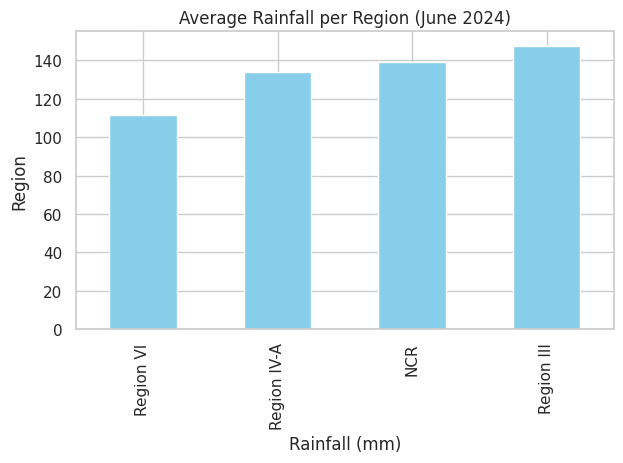

In [ ]:
region_summary['Rainfall (mm)'].sort_values().plot(kind='bar', color='skyblue')
plt.title('Average Rainfall per Region (June 2024)')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Region')
plt.tight_layout()
plt.show()


**Rainfall Category Counts by Region**

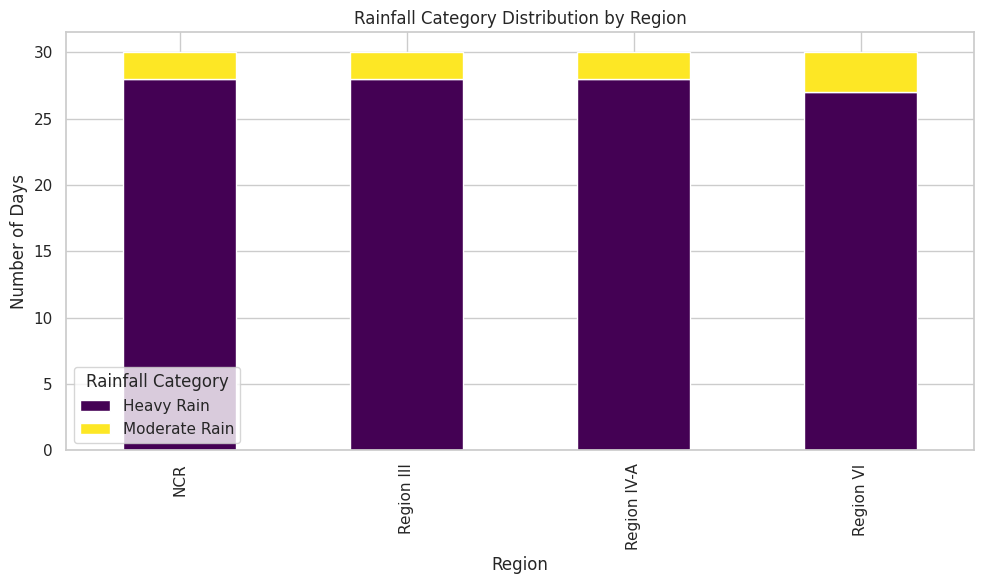

In [ ]:
rain_category_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Rainfall Category Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Days')
plt.legend(title='Rainfall Category')
plt.tight_layout()
plt.show()


Average Temperature by Day of Week

<ipython-input-50-3063657583>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_temp.index, y=day_temp.values, palette='coolwarm')


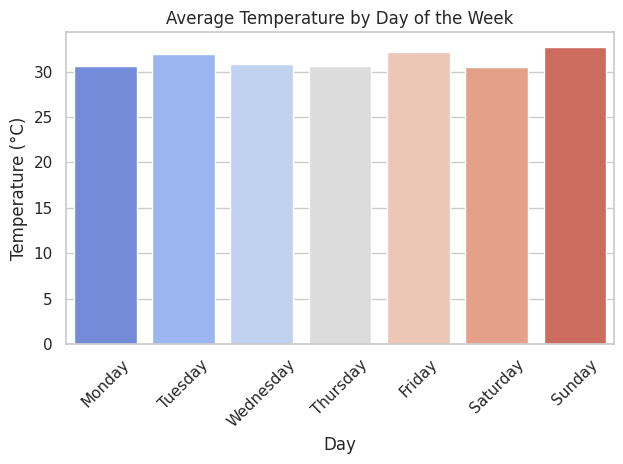

In [ ]:
sns.barplot(x=day_temp.index, y=day_temp.values, palette='coolwarm')
plt.title('Average Temperature by Day of the Week')
plt.ylabel('Temperature (°C)')
plt.xlabel('Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Daily Rainfall Trend (Line Plot)**

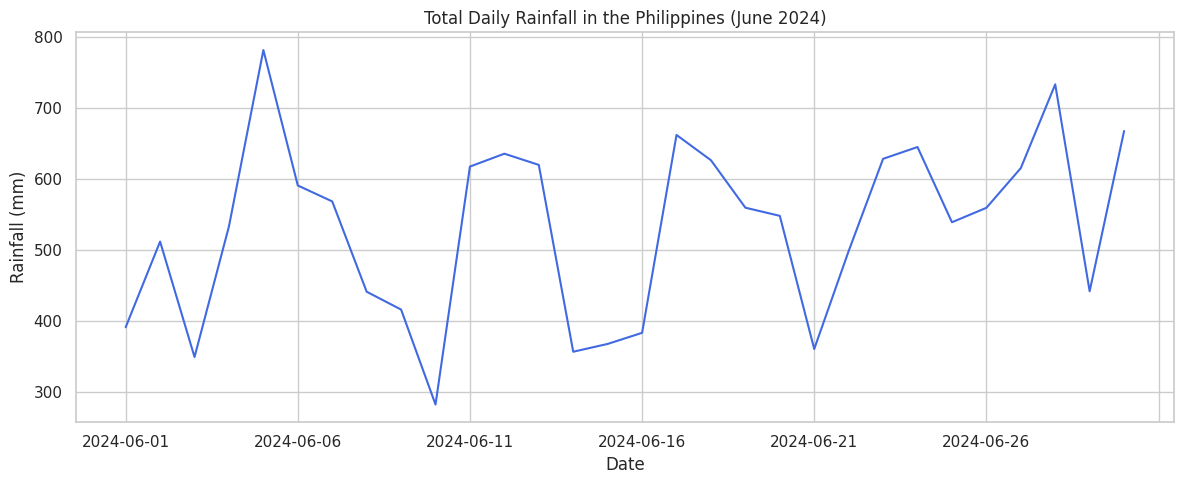

In [ ]:
daily_rain.plot(figsize=(12, 5), color='royalblue')
plt.title('Total Daily Rainfall in the Philippines (June 2024)')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.tight_layout()
plt.show()


**Moving Average Line**

*This helps smooth out the daily rainfall trend to reveal overall patterns*

🟦Blue line: Real daily fluctuations

🟧Orange line: General trend





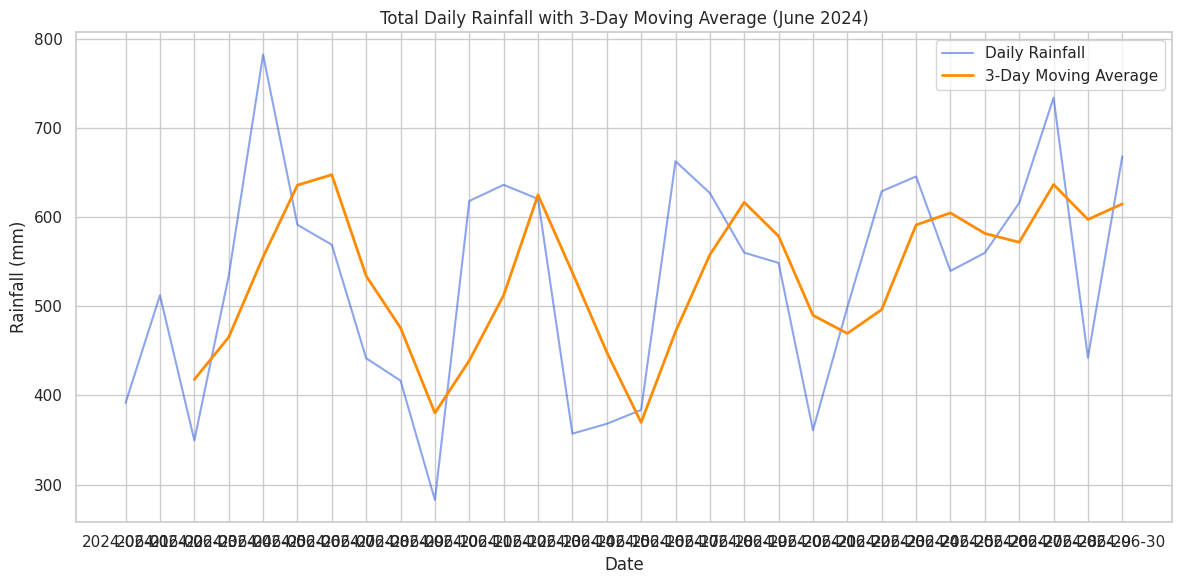

In [ ]:
# Compute 3-day moving average
daily_rain_ma = daily_rain.rolling(window=3).mean()

# Plot actual and moving average together
plt.figure(figsize=(12, 6))
plt.plot(daily_rain.index, daily_rain, label='Daily Rainfall', color='royalblue', alpha=0.6)
plt.plot(daily_rain_ma.index, daily_rain_ma, label='3-Day Moving Average', color='darkorange', linewidth=2)
plt.title('Total Daily Rainfall with 3-Day Moving Average (June 2024)')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.tight_layout()
plt.show()


This beginner-level data engineering project uses simulated but realistic Philippine weather data to explore rainfall, temperature, and wind patterns across different regions. Using Python, the project builds a basic data pipeline including data ingestion, cleaning, feature engineering, analysis, and visualization. Insights from the dataset can help inform decisions related to weather forecasting, regional planning, and climate awareness.


*In the future, this pipeline could be extended to use real-time weather APIs or longer time spans. Further steps could include anomaly detection, weather prediction using regression models, or building dashboards in Streamlit or Power BI.*